## روش K_means

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df = pd.read_csv('1632560262896716.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## پیش پردازش داده ها:

### در این مرحله نیاز داریم تا مقادیر ستون Gender که از نوع string هستند را به مقدار عددی تبدیل کنیم. 

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Female', 'Male'])
df['Gender'] = le.transform(df['Gender'])
df['Gender'] = df['Gender'].astype(np.int64)
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

### سپس داده های مورد نظرمان را از df جدا کرده و اگر مقادیر nan در آن موجود باشد آن را به مقدار عددی تبدیل میکنیم.

In [5]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,2:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

### منحنی Elbow را تشکیل می دهیم تا مقدار مناسب را برای تعداد خوشه ها برای نمودار score-income بدست بیاوریم. با توجه به نمودار زیر به نظر می رسد تعداد خوشه ها را بهتر است 5 در نظر بگیریم.

Text(0.5, 1.0, 'Elbow curve')

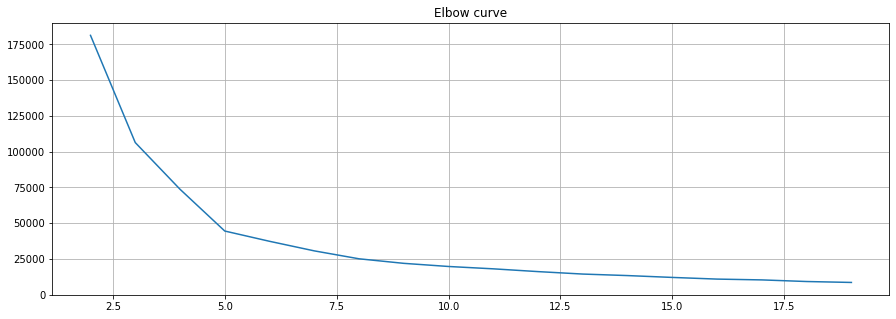

In [6]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X[:,[1,2]])
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

### حال الگوریتم k_means را با تعداد خوشه های مورد نظر و تعداد تکرار 12 به داده های مورد نظرمان اعمال می کنیم.

In [7]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init =12)
k_means.fit(Clus_dataSet[:,[1,2]])
labels = k_means.labels_
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 3 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 1 0 3 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


### نمایش دیتا بر اساس score-income: 

C:\Users\rqase\AppData\Local\Temp/ipykernel_15804/515578511.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 2], c=labels.astype(np.float), alpha=0.5)


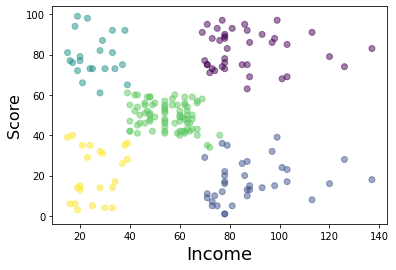

In [8]:
plt.scatter(X[:, 1], X[:, 2], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Income', fontsize=18)
plt.ylabel('Score', fontsize=16)

plt.show()

### منحنی Elbow را تشکیل می دهیم تا مقدار مناسب را برای تعداد خوشه ها برای نمودار score-age بدست بیاوریم. با توجه به نمودار زیر به نظر می رسد تعداد خوشه ها را بهتر است 4 در نظر بگیریم. 

Text(0.5, 1.0, 'Elbow curve')

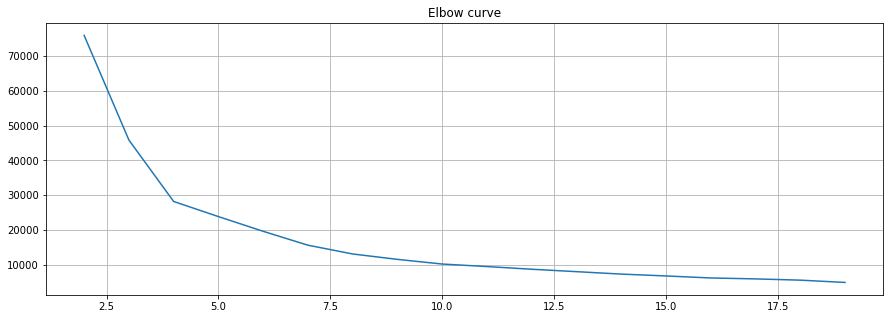

In [9]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X[:,[0,2]])
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [10]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init =12)
k_means.fit(Clus_dataSet[:,[0,2]])
labels = k_means.labels_
print(labels)

[3 1 3 1 3 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 3 1 2 1 2 1 0 1 2 3 3 3 2 1 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 1 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 1 1 3 1 0 1 0 1 0 1 3 1 3 1 0 1 3 1 0 1 3 1 3 1 2 1
 3 1 0 1 0 1 0 1 0 1 0 1 2 1 3 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 3
 1 0 1 0 1 3 1 0 1 0 1 0 1 3 1]


C:\Users\rqase\AppData\Local\Temp/ipykernel_15804/3927134113.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 2], c=labels.astype(np.float), alpha=0.5)


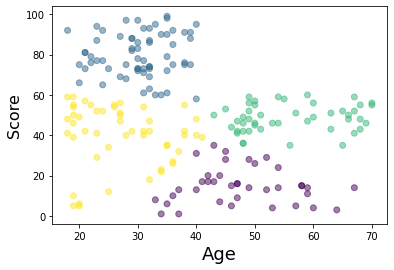

In [11]:
plt.scatter(X[:, 0], X[:, 2], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Score', fontsize=16)

plt.show()

### منحنی Elbow را تشکیل می دهیم تا مقدار مناسب را برای تعداد خوشه ها برای نمودار icome-age بدست بیاوریم. با توجه به نمودار زیر به نظر می رسد تعداد خوشه ها را بهتر است 4 در نظر بگیریم. 

Text(0.5, 1.0, 'Elbow curve')

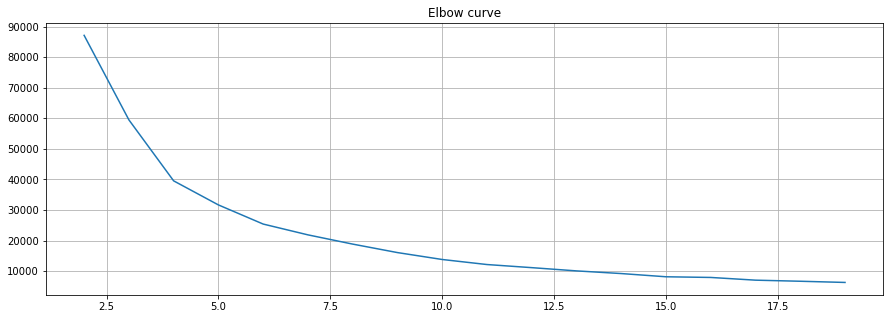

In [12]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X[:,[0,1]])
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [13]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init =12)
k_means.fit(Clus_dataSet[:,[0,1]])
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 2 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 3 2 2 2 1 2 2 2 2 2 3 2
 2 2 3 3 3 2 3 2 2 2 2 2 1 2 2 2 3 3 3 3 3 3 3 2 3 3 3 2 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


C:\Users\rqase\AppData\Local\Temp/ipykernel_15804/1464367865.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), alpha=0.5)


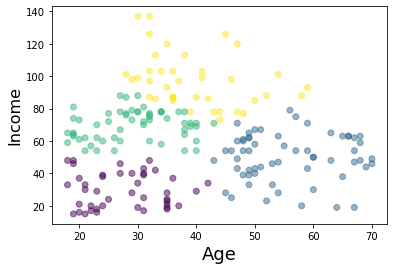

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

## روش DBSCAN:

In [15]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

### بعد از چندین بار تغییر مقادیر epsilon و minimumSamples به این نتیجه رسیدم که مقادیر زیر بهتری عمل می کنند.

In [16]:
epsilon = 12.5
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
        3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64)

In [17]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [18]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [19]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4}

In [20]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


### نمایش دیتا بر اساس score-age:

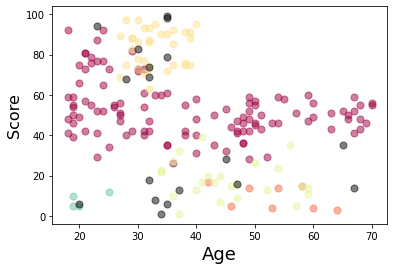

In [21]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)
    plt.xlabel('Age', fontsize=18)
    plt.ylabel('Score', fontsize=16)

### نمایش دیتا بر اساس score-income:

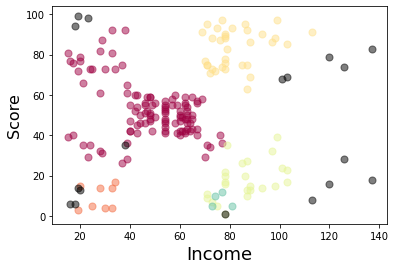

In [22]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 1], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 1], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)
    plt.xlabel('Income', fontsize=18)
    plt.ylabel('Score', fontsize=16)

### نمایش دیتا بر اساس income-age:

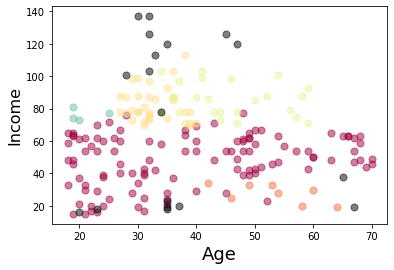

In [23]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    plt.xlabel('Age', fontsize=18)
    plt.ylabel('Income', fontsize=16)

### با مقایسه نمایش دیتا در دو روش k_means و DBSCAN به نظر می رسد که روش k_means برای این داده ها بهتر عمل کرده است هرچند که تعدادی از داده ها با توجه به نمودارهای بالا به نظرمی رسد ارتباط چندانی با سایر داده ها ندارند و بهتر است که در خوشه ها قرار نگیرند همانطور که DBSCAN نیز این را به خوبی تشخیص داده و آنها را داده پرت در نظر گرفته است. 